# Open CV


In [1]:
import cv2
print(cv2.__version__)

4.8.0


In [2]:
import numpy as np
import pandas as pd

In [4]:
image=np.zeros((200,400),np.uint8)
image[:]=200

# 윈도우 생성
cv2.namedWindow("윈도우 생성")

# 윈도우에 이미지 생성
cv2.imshow("윈도우생성",image)

# 키보드 입력 대기
cv2.waitKey(0) 

# 윈도우 종료
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### 도형그리기

#### 직선 및 사각형

In [5]:
# 흰색 이미지 배열 생성
# 자료형을 np.uint8 로 설정  - 이미지는 0~255 사이의 숫자만 이용
# 이미지가 2차원 - 흑백, 3차원 - 컬러
image=np.zeros(shape=(512,512,3),dtype=np.uint8)+255 # 	512,512,3 -> 컬러색상

# 튜플로 좌표 생성
pt1=100,100
pt2=400,400
cv2.rectangle(image,pt1,pt2,(255,0,0),2)


# 윈도우에 이미지 출력
cv2.imshow('image',image)
# 키보드 입력 대기
cv2.waitKey(0)
# 윈도우 종료
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

#### 원그리기

In [4]:
# 원그리기
# 흰색 이미지 배열 생성
# 자료형을 np.uint8 로 설정  - 이미지는 0~255 사이의 숫자만 이용
# 이미지가 2차원 - 흑백, 3차원 - 컬러
image=np.zeros(shape=(512,512,3),dtype=np.uint8)+255 # 	512,512,3 -> 컬러색상

# OPEN cv에서는 옵션을 정수로 설정한다. -> python 에서는 일반적인 나누기를 하면 실수로 값을 제공한다. 

# cv2.circle(image,(image.shape[0]//2,image.shape[1]//2),radius=50,color=(0,0,255),thickness=2)
cv2.circle(image,(int(image.shape[0]/2),image.shape[1]//2),radius=50,color=(0,0,255),thickness=-1) # thickness 에 -1 을 주면 원 안을 채워준다


# 윈도우에 이미지 출력
cv2.imshow('image',image)
# 키보드 입력 대기
cv2.waitKey(0)
# 윈도우 종료
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

(2270, 3600)


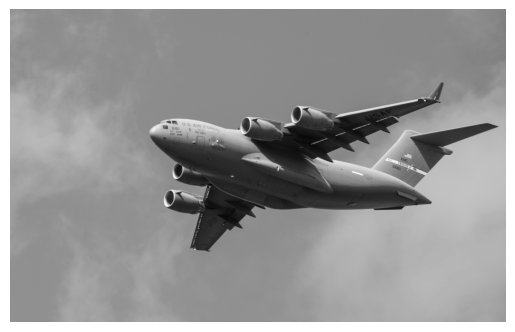

In [8]:
import matplotlib.pyplot as plt


# 이미지 데이터를 흑백으로 가져오기 - 2차원 배열
# C/C++이나 Python 에서는 상수를 정의할 떄 이름을 사용한 경우에 상수 대신 값을 직접 입력해도 된다. 
# cv2.IMREAD_GraySCALE 대신 0을 입렫해도 된다. 
# 그렇지만 상수 이름을 입력하는것을 권장한다. 

# 흑백 데이터 출력

image=cv2.imread('./data/plane.jpg',cv2.IMREAD_GRAYSCALE)
print(image.shape)


plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()


(2270, 3600, 3)


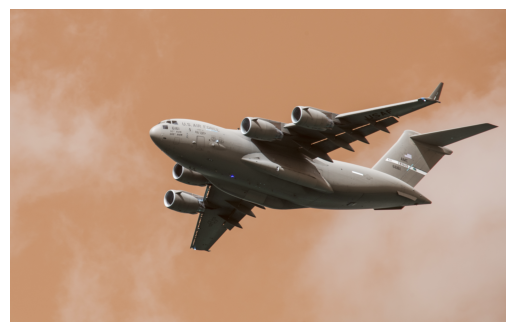

In [9]:
# Opencv는 이미지를 컬러로 가져오면 RGB 가 아니라 BGR 로 가져온다. -> 이를 변경해주자.

image=cv2.imread('./data/plane.jpg',cv2.IMREAD_COLOR)
print(image.shape)


plt.imshow(image)
plt.axis('off')
plt.show()



